# Machine Learning Lab - Steel Industry
## Part 1: Data Exploration

### Introduction to the dataset

This lab uses a dataset from a steel industry, collected over the period 2018 to 2019.
It contains detailed energy measurements from an industrial facility, offering a unique opportunity to analyze and optimize energy consumption in a real industrial context.

#### Description of variables:

1. **Temporal variables:**
   - `date`: Date and time of the measurement
   - `Day_of_week`: Day of the week (Monday to Sunday)
   - `NSM`: Number of Seconds from Midnight
   - `WeekStatus`: Type of day (Weekday/Weekend)

2. **Main energy variables:**
   - `Usage_kWh`: Energy consumption in kilowatt-hours (TARGET)
   - `Lagging_Current_Reactive.Power_kVarh`: Lagging reactive power
   - `Leading_Current_Reactive_Power_kVarh`: Leading reactive power
   - `CO2(tCO2)`: CO2 emissions in tons

3. **Power factors:**
   - `Lagging_Current_Power_Factor`: Lagging power factor
   - `Leading_Current_Power_Factor`: Leading power factor

#### Possible applications:

1. **Consumption prediction:**
   - Forecasting energy consumption
   - Estimating CO2 emissions
   - Production planning

2. **Energy optimization:**
   - Identifying periods of high consumption
   - Analyzing energy efficiency
   - Reducing CO2 emissions

3. **Anomaly detection:**
   - Identifying unusual consumption
   - Detecting malfunctions
   - Predictive maintenance

4. **Pattern analysis:**
   - Daily and weekly variations
   - Impact of weekdays vs weekends
   - Correlations between energy variables

In [15]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import normaltest


# Display configuration
sns.set_theme()
%matplotlib inline

# Download and load the data
!wget -O steel_industry_data.zip https://archive.ics.uci.edu/static/public/851/steel+industry+energy+consumption.zip
!unzip -o steel_industry_data.zip

# Load the data
df = pd.read_csv('Steel_industry_data.csv')

# Convert dates with European format (day/month/year)
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y %H:%M')

# Display the first rows with better formatting
print("\nPreview of the first rows:")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
print(df.head().to_string())

# Information about the dataset structure
print("\nDataset structure:")
print(f"Number of observations: {df.shape[0]:,}")
print(f"Number of variables: {df.shape[1]:,}")

# Summary of variable types
print("\nVariable types:")
display(df.dtypes)

# Example values for categorical variables
print("\nUnique values in categorical variables:")
for col in ['Day_of_week', 'WeekStatus', 'Load_Type']:
    print(f"\n{col} :")
    print(df[col].value_counts())

# Detailed descriptive statistics
print("\nDescriptive statistics of numerical variables:")
# /!\ Complete the '...' to get a description (Pandas) of the dataset /!\
desc_stats = df.describe()
display(desc_stats)

# Check temporal coverage
print("\nPeriod covered by the dataset:")
print(f"Start: {df['date'].min()}")
print(f"End: {df['date'].max()}")
print(f"Duration: {(df['date'].max() - df['date'].min()).days} days")

# Check for missing values
print("\nMissing values per variable:")
print(df.isnull().sum())

--2025-05-28 12:57:13--  https://archive.ics.uci.edu/static/public/851/steel+industry+energy+consumption.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘steel_industry_data.zip’

steel_industry_data     [     <=>            ] 470.68K   522KB/s    in 0.9s    

2025-05-28 12:57:14 (522 KB/s) - ‘steel_industry_data.zip’ saved [481973]

Archive:  steel_industry_data.zip
  inflating: Steel_industry_data.csv  

Preview of the first rows:
                 date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM WeekStatus Day_of_week   Load_Type
0 2018-01-01 00:15:00       3.17                                  2.95                                   0.0        0.0                         73.2

,0
date,datetime64[ns]
Usage_kWh,float64
Lagging_Current_Reactive.Power_kVarh,float64
Leading_Current_Reactive_Power_kVarh,float64
CO2(tCO2),float64
Lagging_Current_Power_Factor,float64
Leading_Current_Power_Factor,float64
NSM,int64
WeekStatus,object
Day_of_week,object



Unique values in categorical variables:

Day_of_week :
Day_of_week
Monday       5088
Tuesday      4992
Wednesday    4992
Thursday     4992
Friday       4992
Saturday     4992
Sunday       4992
Name: count, dtype: int64

WeekStatus :
WeekStatus
Weekday    25056
Weekend     9984
Name: count, dtype: int64

Load_Type :
Load_Type
Light_Load      18072
Medium_Load      9696
Maximum_Load     7272
Name: count, dtype: int64

Descriptive statistics of numerical variables:


,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,2018-07-02 11:52:30,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
min,2018-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018-04-02 05:56:15,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,2018-07-02 11:52:30,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,2018-10-01 17:48:45,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,2018-12-31 23:45:00,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000
std,NaN,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317



Period covered by the dataset:
Start: 2018-01-01 00:00:00
End: 2018-12-31 23:45:00
Duration: 364 days

Missing values per variable:
date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64


### Points to consider for the analysis:

1. **Necessary preprocessing:**
   - Standardization of numerical variables
   - Encoding of categorical variables
   - Handling temporal aspects

2. **Business aspects to consider:**
   - Industrial production cycles
   - Energy constraints
   - Environmental objectives (CO2)

3. **Analysis opportunities:**
   - Consumption patterns
   - Energy efficiency
   - Cost optimization

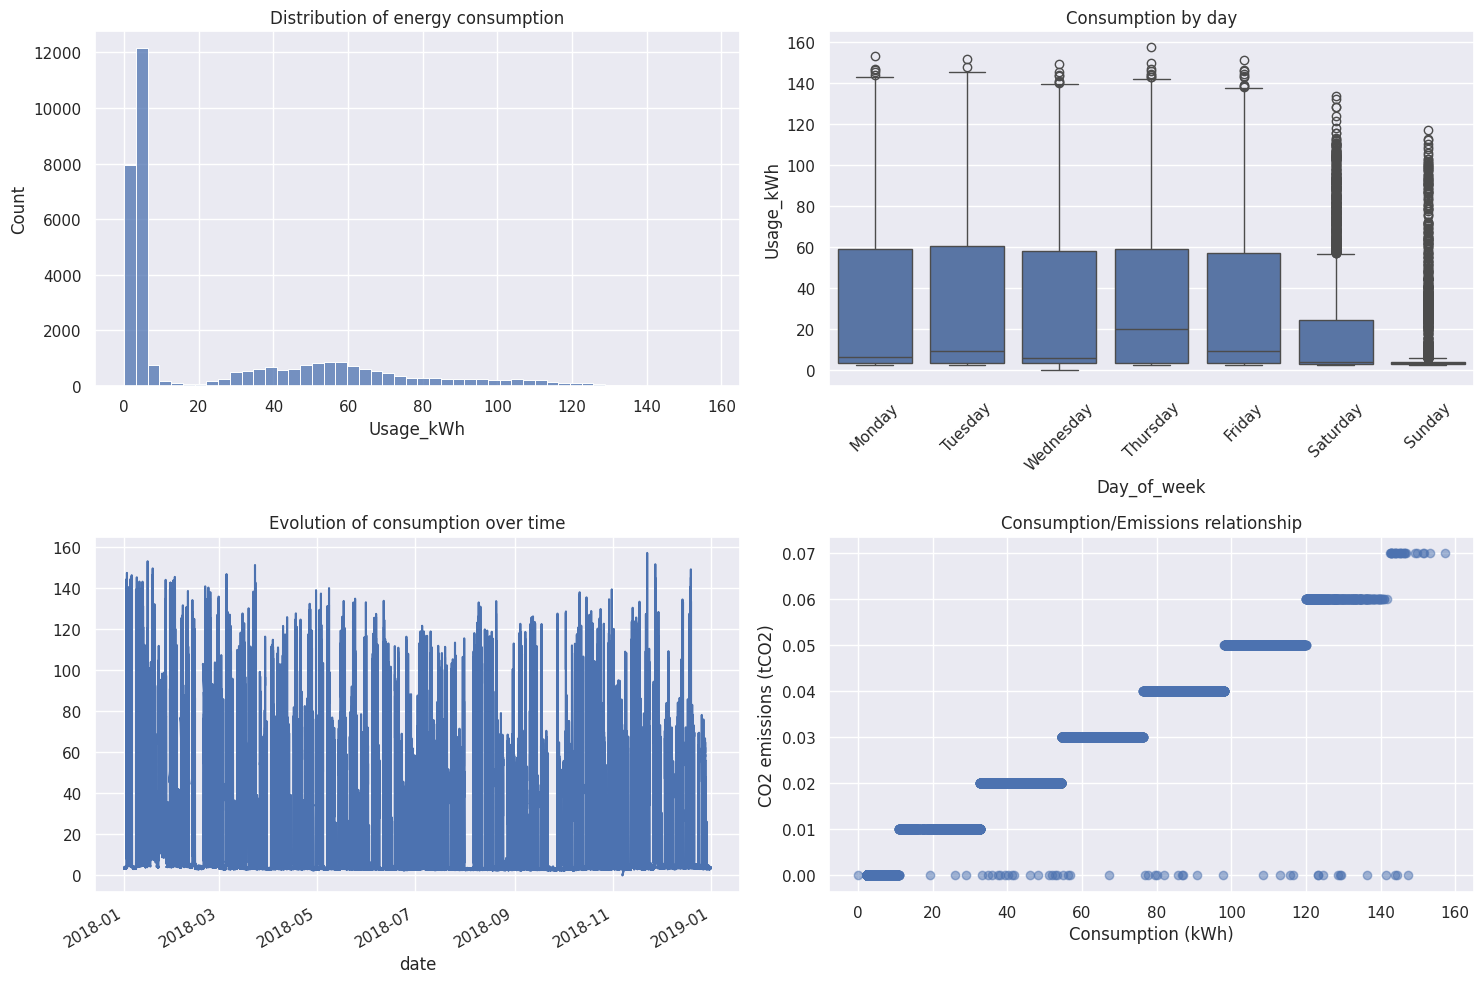

In [16]:
# Initial visualization of distributions
plt.figure(figsize=(15, 10))

# Distribution of energy consumption
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='Usage_kWh', bins=50)
plt.title('Distribution of energy consumption')

# Consumption by day of the week
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='Day_of_week', y='Usage_kWh')
# /!\ Complete the '...' to rotate the x-axis labels by 45° (Matplotlib) /!\
plt.xticks(rotation=45)
plt.title('Consumption by day')

# Temporal evolution
plt.subplot(2, 2, 3)
df.set_index('date')['Usage_kWh'].plot()
plt.title('Evolution of consumption over time')

# CO2/Consumption relationship
plt.subplot(2, 2, 4)
plt.scatter(df['Usage_kWh'], df['CO2(tCO2)'], alpha=0.5)
plt.xlabel('Consumption (kWh)')
plt.ylabel('CO2 emissions (tCO2)')
plt.title('Consumption/Emissions relationship')

plt.tight_layout()
plt.show()

❓ **Questions:**
1. How many numerical and categorical variables do we have?
2. Are there any missing values to handle?
3. What are the value ranges for each variable?
4. What are the main characteristics of energy consumption?
5. How does consumption vary by day of the week?
6. What is the nature of the relationship between consumption and CO2 emissions?

### 2. Distribution analysis
Let's visualize the distribution of our main variables.

<Figure size 1500x1000 with 0 Axes>

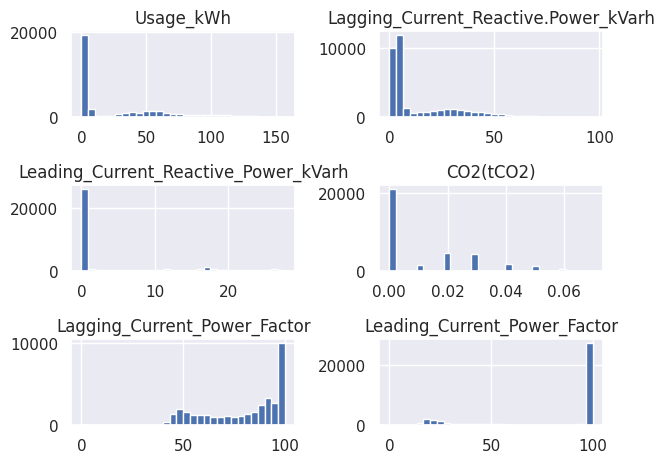

In [17]:
# Visualization of the distribution of numerical variables
plt.figure(figsize=(15, 10))
df.select_dtypes(include=['float64']).hist(bins=30)
plt.tight_layout()
plt.show()

### 3. Correlation analysis
Let's study the relationships between our variables.

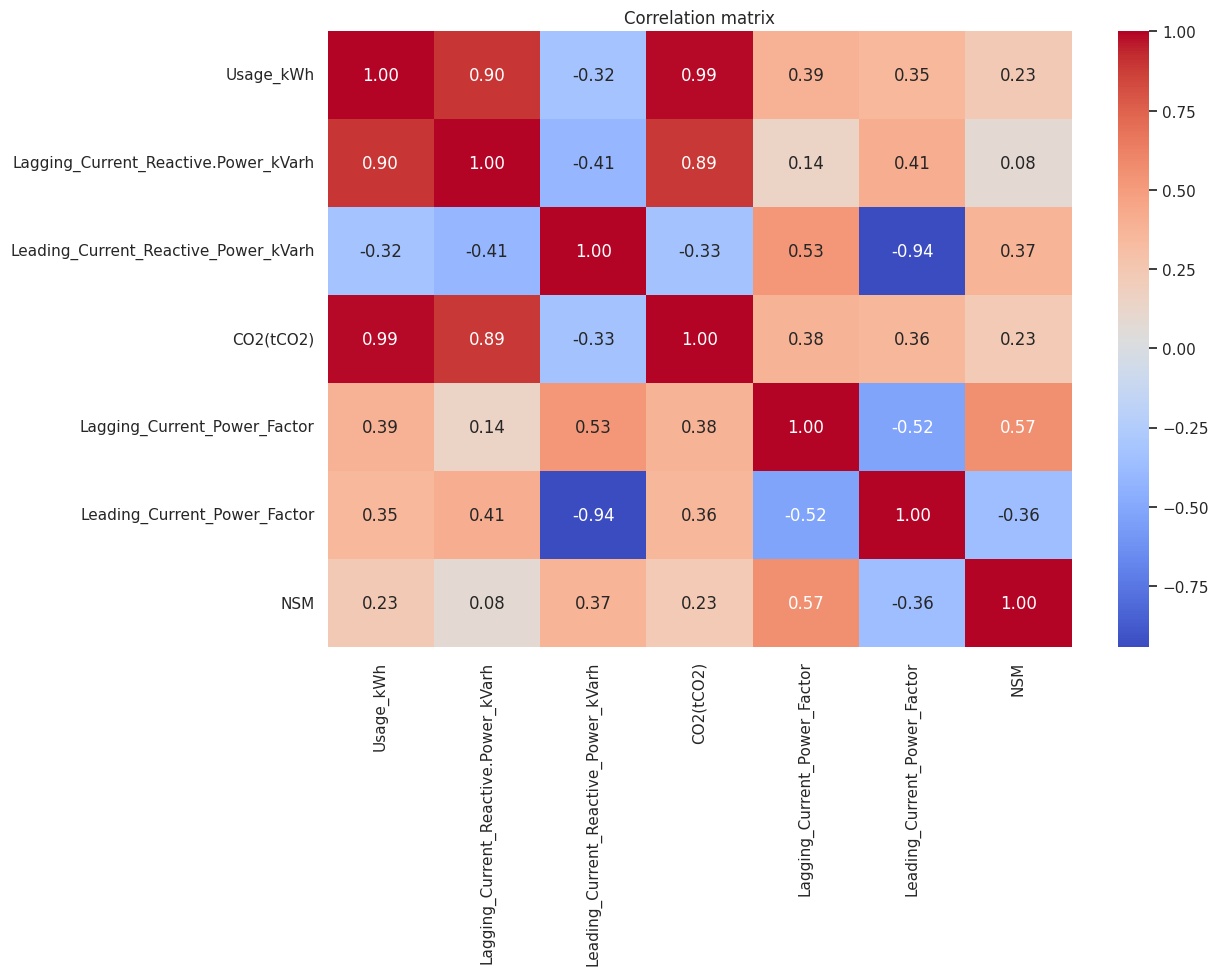

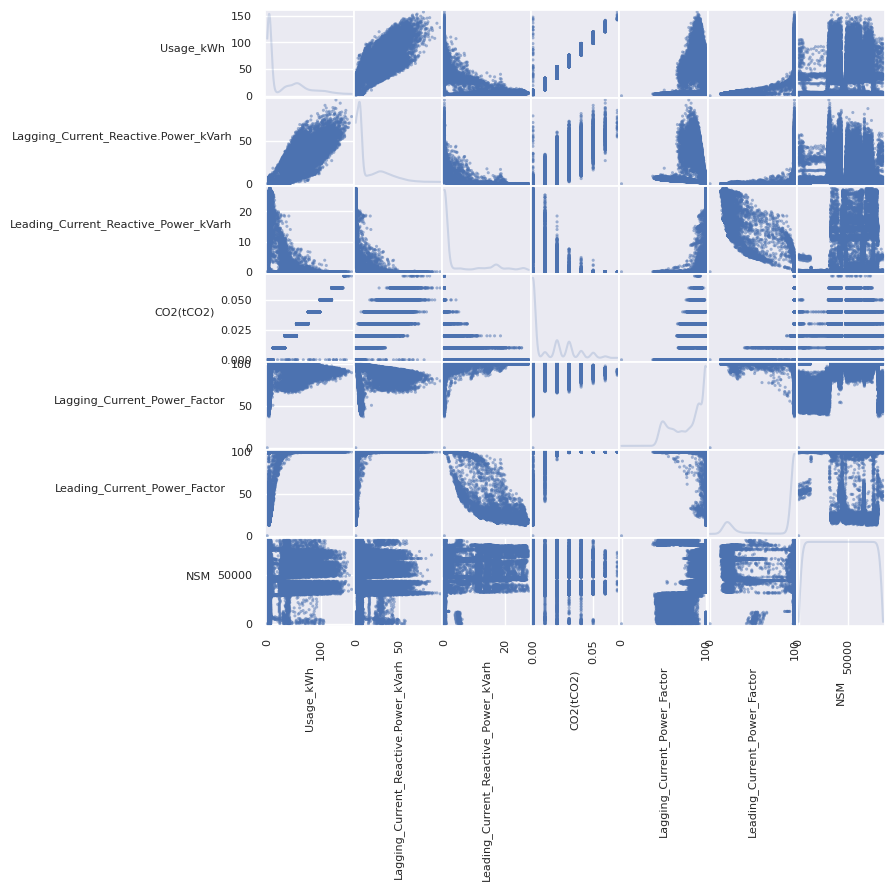

In [18]:
# Data preprocessing for correlation
# Remove non-numeric columns
df_num = df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation matrix')
plt.show()

# Scatter matrix for all numerical variables
# Set font size for labels
plt.rcParams['axes.labelsize'] = 8
plt.rcParams['xtick.labelsize'] = 6
plt.rcParams['ytick.labelsize'] = 6

# Create the scatter matrix
axes = pd.plotting.scatter_matrix(df_num,
                                figsize=(8, 8),
                                diagonal='kde',
                                alpha=0.5,
                                density_kwds={'alpha': 0.2},
                                marker='.',
                                s=20)  # Reduced point size

# Rotate labels for better readability
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

# Reset font parameters
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

❓ **Questions:**
1. Which variables are most correlated with energy consumption?
2. Do you observe any surprising correlations?
3. Which variables seem the least important?

### 4. In-depth analysis of relationships between variables

So far, we have analyzed linear (Pearson) correlations between our variables.
However, in real data, relationships can be more complex.
Let's deepen our analysis in three steps:

1. **Creation of new indicators:** Relevant ratios for energy analysis
2. **Analysis of non-linear correlations:** Using the Spearman coefficient
3. **Visualization of interactions:** Impact of different factors on consumption

#### 4.1 Creation of energy indicators

In [21]:
# Creation of relevant energy ratios
df['power_factor_ratio'] = df['Lagging_Current_Power_Factor'] / df['Leading_Current_Power_Factor']
df['reactive_power_ratio'] = df['Lagging_Current_Reactive.Power_kVarh'] / df['Leading_Current_Reactive_Power_kVarh']

#### 4.2 Comparison of linear and non-linear correlations

- **Pearson correlation** (seen previously): measures linear relationships
- **Spearman correlation**: measures monotonic relationships (even non-linear)

Let's compare the two approaches:

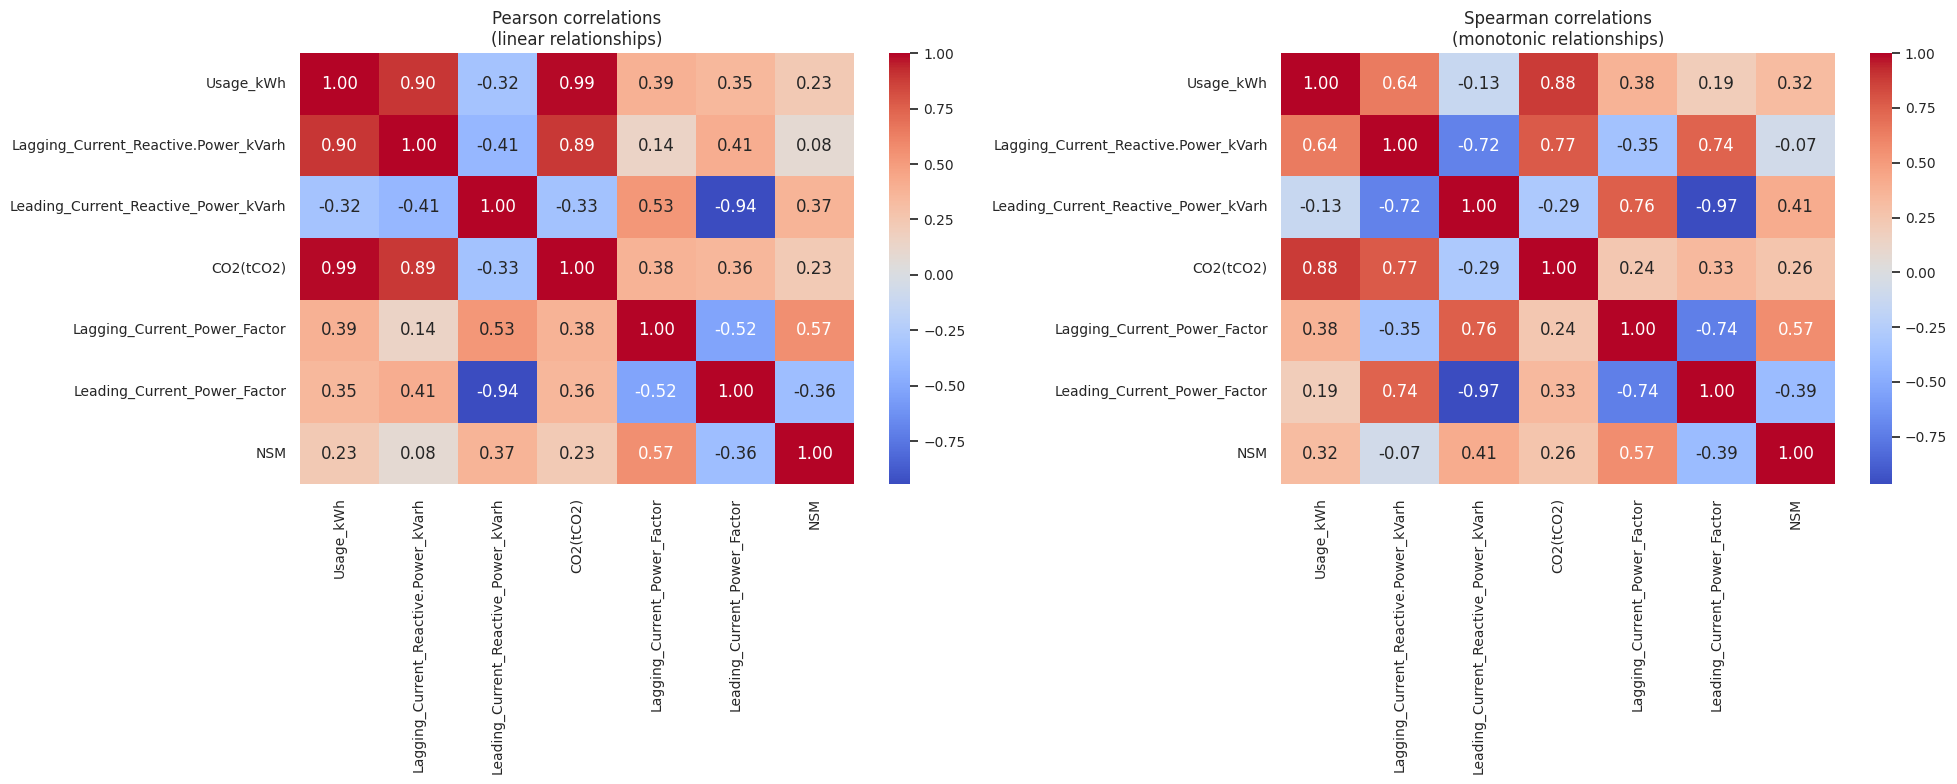

In [19]:
# Selection of numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Creation of the two correlation matrices
pearson_corr = df[numeric_cols].corr(method='pearson')
# /!\ Complete the '...' to get a correlation matrix with the Spearman method /!\
spearman_corr = df[numeric_cols].corr(method='spearman')

# Side-by-side visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt='.2f', ax=ax1)
ax1.set_title('Pearson correlations\n(linear relationships)')

sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt='.2f', ax=ax2)
ax2.set_title('Spearman correlations\n(monotonic relationships)')

plt.tight_layout()
plt.show()

#### 4.3 Analysis of specific interactions

Let's visualize some important relationships to understand their nature:

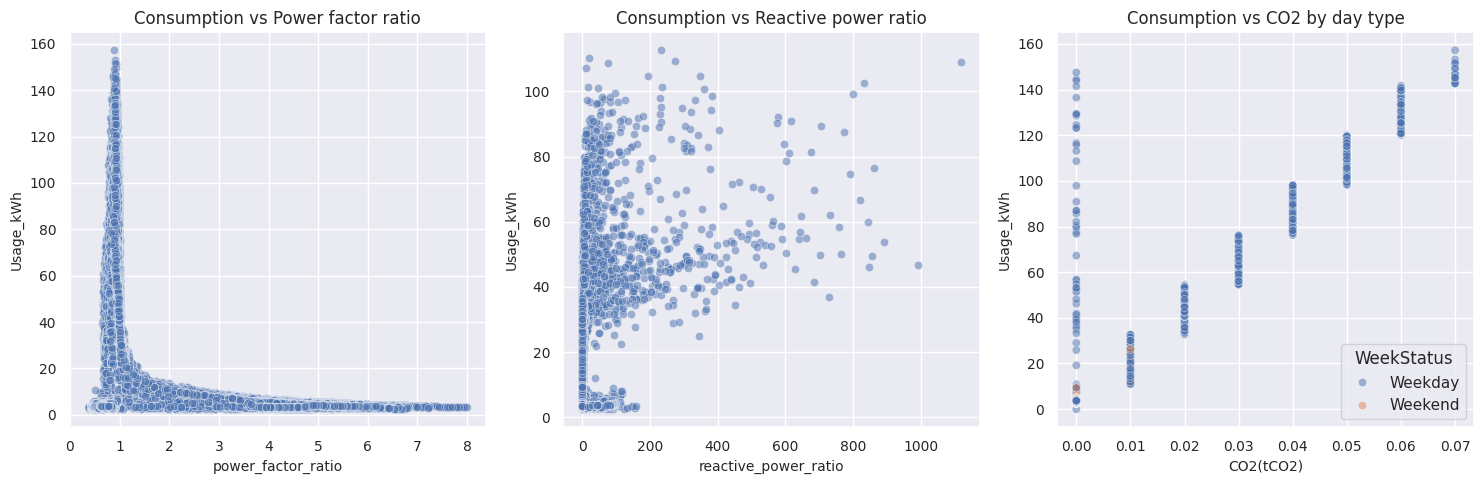

In [23]:
# Visualization of key interactions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='power_factor_ratio', y='Usage_kWh', alpha=0.5)
plt.title('Consumption vs Power factor ratio')

plt.subplot(1, 3, 2)
# /!\ Complete the '...' to get a scatterplot (Seaborn) of the reactive power ratio as a function of energy consumption /!\
sns.scatterplot(data=df, x='reactive_power_ratio', y='Usage_kWh', alpha=0.5)
plt.title('Consumption vs Reactive power ratio')

plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='CO2(tCO2)', y='Usage_kWh',
                hue='WeekStatus', alpha=0.5)
plt.title('Consumption vs CO2 by day type')

plt.tight_layout()
plt.show()

❓ **Analysis questions:**

1. **Comparison of correlations**
   - What differences do you observe between Pearson and Spearman correlations?
   - For which variables are the differences most marked?
   - What does this teach us about the nature of the relationships between variables?

2. **Energy ratios**
   - Why were these specific ratios created?
   - What do they reveal about energy efficiency?

3. **Consumption patterns**
   - How does the CO2/consumption relationship vary by type of day?
   - What implications does this have for energy management?
   - What recommendations could you make?

### 5. Data preparation for learning

Day categories: ['Friday' 'Monday' 'Saturday' 'Sunday' 'Thursday' 'Tuesday' 'Wednesday']
Encoded days: ['Day_Friday', 'Day_Monday', 'Day_Saturday', 'Day_Sunday', 'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday']


,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Status_Weekday,Status_Weekend
0,-0.724105,-0.618516,-0.521385,-0.71355,-0.389410,0.513268,-1.678015,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.699287,-0.525911,-0.521385,-0.71355,-0.729772,0.513268,-1.641929,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.722012,-0.598278,-0.521385,-0.71355,-0.544264,0.513268,-1.605843,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.719919,-0.581106,-0.521385,-0.71355,-0.660009,0.513268,-1.569756,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.704669,-0.523458,-0.521385,-0.71355,-0.838117,0.513268,-1.533670,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,-0.703772,-0.501380,-0.521385,-0.71355,-0.976587,0.513268,1.605843,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
35036,-0.707061,-0.570067,-0.521385,-0.71355,-0.521538,0.513268,1.641929,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
35037,-0.705865,-0.605024,-0.511957,-0.71355,-0.209188,0.512611,1.678015,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
35038,-0.705865,-0.611770,-0.506569,-0.71355,-0.151052,0.511954,1.714102,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


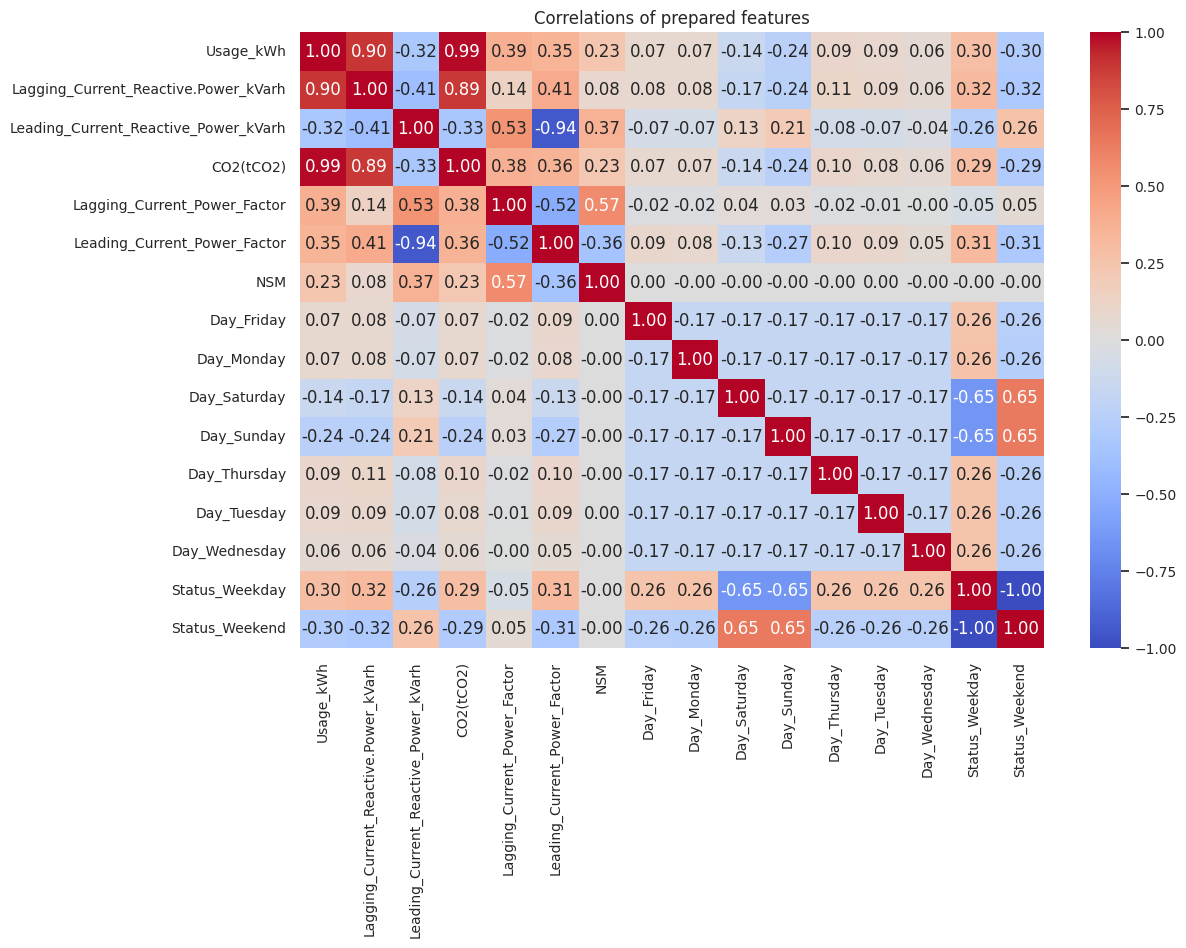

In [24]:
# Data preparation for tests
# Conversion of categorical variables
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Encoding of categorical variables
# Define the explicit order of days
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Encoding of categorical variables
categorical_features = ['Day_of_week', 'WeekStatus']
encoder = OneHotEncoder(sparse_output=False)  # Remove drop='first' to see all days

# Ensure days are in the correct order
df['Day_of_week'] = pd.Categorical(df['Day_of_week'], categories=days_order, ordered=True)

# Encode the variables
encoded_features = encoder.fit_transform(df[categorical_features])

# Create column names for encoded variables
day_names = [f'Day_{day}' for day in encoder.categories_[0]]  # All days
week_status_names = [f'Status_{status}' for status in encoder.categories_[1]]
encoded_columns = day_names + week_status_names

# Display for verification
print("Day categories:", encoder.categories_[0])
print("Encoded days:", day_names)

# Create DataFrame with encoded variables
df_encoded = pd.DataFrame(encoded_features, columns=encoded_columns)

# Select numeric features
numeric_features = [
    'Usage_kWh',
    'Lagging_Current_Reactive.Power_kVarh',
    'Leading_Current_Reactive_Power_kVarh',
    'CO2(tCO2)',
    'Lagging_Current_Power_Factor',
    'Leading_Current_Power_Factor',
    'NSM'
]

# Standardization of numeric variables
scaler = StandardScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df[numeric_features]),
    columns=numeric_features
)

# Combine numeric and encoded features
# /!\ Complete the '...' to get a concatenation (Pandas) of df_scaled and df_encoded /!\
df_final = pd.concat([df_scaled, df_encoded], axis=1)

display(df_final)
# display(df_final.loc[2000:2300])

# Check residual correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df_final.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlations of prepared features')
plt.show()

❓ **Questions:**

1. **Relationships between energy variables**
   - What is the relationship between consumption (Usage_kWh) and CO2 emissions?
   - Why is there a strong correlation between these variables?
   - What other variables are strongly correlated with consumption?

2. **Relationships between power factors**
   - How to interpret the correlation between Lagging and Leading Power Factor?
   - Why do these factors have different relationships with consumption?
   - What impact can this have on energy efficiency?

3. **Data structure**
   - Are there redundant variables that could be eliminated?
   - Which variables seem most important for prediction?

4. **Practical implications**
   - How can these correlations guide energy optimization?
   - Which variables should be monitored as a priority?
   - What business recommendations can be drawn from this?

### 6. In-depth temporal analysis

Temporal analysis is crucial to understanding energy consumption patterns.

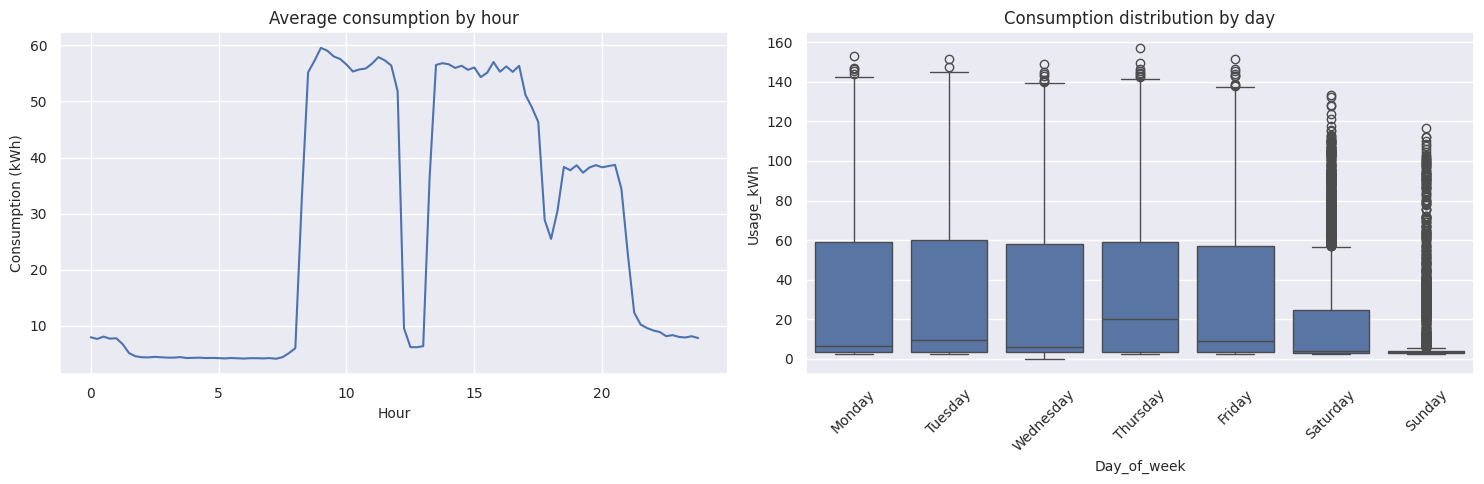


Weekly statistics:


<ipython-input-25-bc3d73ebd43e>:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekly_stats = df.groupby('Day_of_week').agg({


Usage_kWh                      CO2(tCO2)      
                 mean    std   min     max      mean   std
Day_of_week                                               
Monday          33.14  35.39  2.45  153.14      0.01  0.02
Tuesday         34.43  35.83  2.48  151.67      0.01  0.02
Wednesday       32.25  35.71  0.00  149.18      0.01  0.02
Thursday        35.11  36.42  2.45  157.18      0.02  0.02
Friday          33.20  34.71  2.48  151.31      0.01  0.02
Saturday        15.92  23.65  2.45  133.42      0.01  0.01
Sunday           7.55  14.19  2.48  116.78      0.00  0.01

In [25]:
# Conversion of the NSM column (Number of Seconds from Midnight) to hour
df['hour'] = df['NSM'] / 3600

# Hourly analysis
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
hourly_consumption = df.groupby('hour')['Usage_kWh'].mean()
plt.plot(hourly_consumption.index, hourly_consumption.values)
plt.title('Average consumption by hour')
plt.xlabel('Hour')
plt.ylabel('Consumption (kWh)')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Day_of_week', y='Usage_kWh')
plt.title('Consumption distribution by day')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Weekly pattern analysis
weekly_stats = df.groupby('Day_of_week').agg({
    'Usage_kWh': ['mean', 'std', 'min', 'max'],
    'CO2(tCO2)': ['mean', 'std']
}).round(2)

print("\nWeekly statistics:")
display(weekly_stats)

❓ **Questions:**
1. What are the peak consumption hours?
2. Is there a significant difference between days of the week?
3. How can the observed variations be explained?